Simple profile estimation of light emitted and aperture fit

In [ ]:
import PIL as pil
import numpy as np
import matplotlib.pyplot as plt
import  photutils as ph

Load the image from SDSS cutouts and convert the image to np array

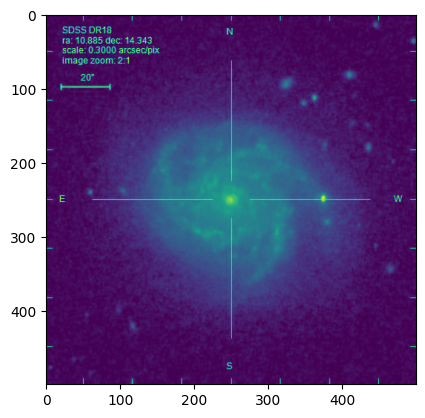

In [41]:
img=pil.Image.open("/home/kevin/aufklarung_astro_station/project2/images/image_10.884908ra_14.34258dec_GALAXY_471804044415887360specObjID_SDSS_dr18.jpg")
img_array=np.array(img)
img_array.shape
img_array=img_array[:,:,1]
plt.imshow(img_array)

Compute radial profile of the galaxy

In [17]:
xycen=ph.centroids.centroid_quadratic(img_array, xpeak=250, ypeak=250)
from photutils.profiles import RadialProfile
edge_radii = np.arange(150)
rp = RadialProfile(img_array, xycen, edge_radii)

Plot the profile and the aperture

(<matplotlib.patches.PathPatch at 0x7c619db0c8f0>,)

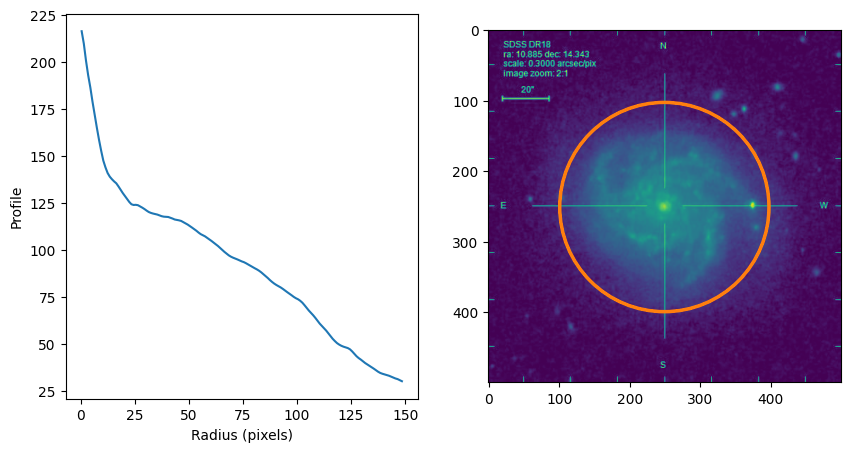

In [38]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
rp.plot(label='Radial Profile')
plt.subplot(1,2,2)
plt.imshow(img_array)
rp.apertures[148].plot(color='C1', lw=2)